# Explore Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 6)

In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# EDA

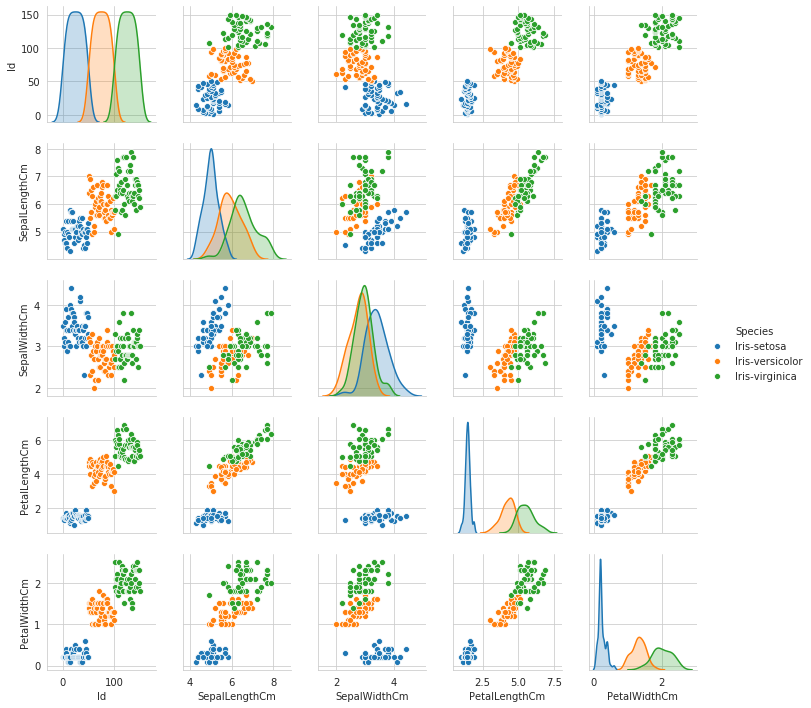

In [10]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='Species',height=2)
plt.show()

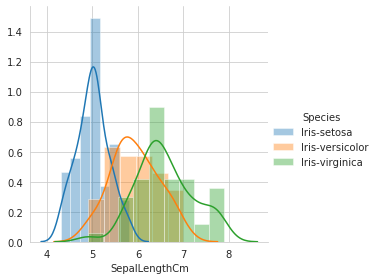

In [11]:
#Unvariate analysis(SL,SW,PL,PW)
#probability density function
sns.FacetGrid(data,hue='Species',height=4).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

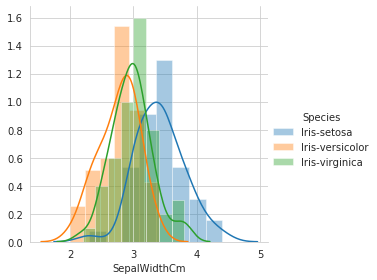

In [12]:
sns.FacetGrid(data,hue='Species',height=4).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

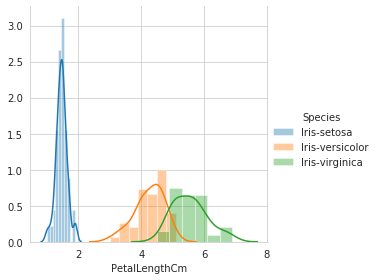

In [13]:
sns.FacetGrid(data,hue='Species',height=4).map(sns.distplot,"PetalLengthCm").add_legend()
plt.show()   

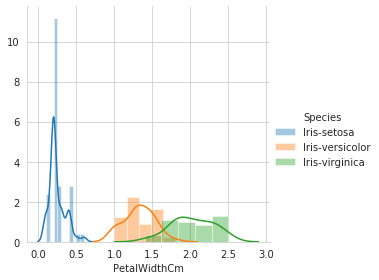

In [14]:
sns.FacetGrid(data,hue='Species',height=4).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()   

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from warnings import filterwarnings
filterwarnings('ignore')

# Data Preparation

In [16]:
x=data.drop('Species',axis=1)
y=data['Species']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Modeling

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()

In [19]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Predicting the accuracy

In [20]:
y_pred=model_dt.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_dt.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Decision Tree \n",classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]
Train Accuracy : 100.0 %
Test Accuracy  : 97.368 %
classification report of Decision Tree 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Visualize Decision tree

In [21]:
from sklearn import tree
#plt.figure(figsize=(10,10))
#tree.plot_tree(model_dt,filled=True)

In [22]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

In [23]:
# Visualize the graph
def plot_decision_tree(model_dt,features,classes):
    dot_data = StringIO()
    tree.export_graphviz(model_dt, out_file=dot_data, feature_names=features,class_names=classes,filled=True,rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return Image(graph.create_png())

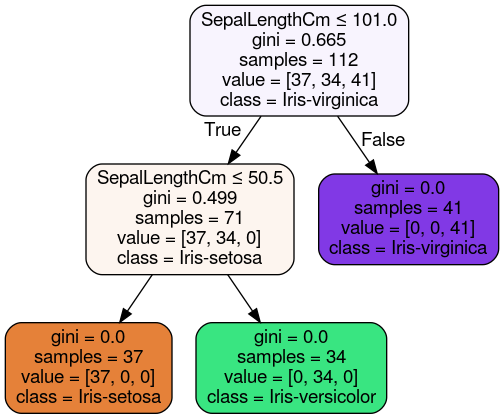

In [24]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_decision_tree(model_dt,features,classes)